In [ ]:
<h1> Hypothesis testing</h1>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('WineQuality-RedWine.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


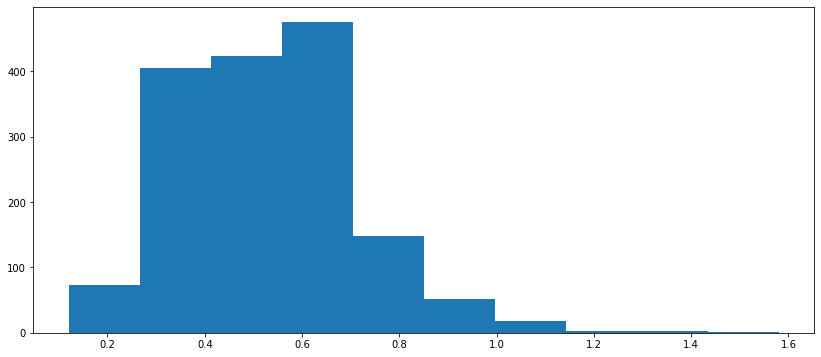

In [5]:
plt.figure(figsize=(14,6))
plt.hist(df['volatile acidity'])
plt.show()

<h3>Normality test using Shapiro-Wilk Test to test if data is normally distributed</h3>

In [6]:
from scipy.stats import shapiro

test_data = df['volatile acidity']

stat, p = shapiro(test_data)

print('Statistic : %.2f, p-value: %.30f ' %(stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

Statistic : 0.97, p-value: 0.000000000000000268638537394731 
Not a normal distribution


<h3> Lets perform this test on a known normal distribution</h3>

In [16]:
from numpy.random import randn
n_test_data = randn(100)

In [8]:
n_test_data

array([ 0.7686646 , -0.94181054,  0.92787263,  1.21298976, -0.47097107,
       -1.05371965, -1.20631199, -1.26118346,  0.17808726, -0.21646841,
       -0.3788408 ,  0.34653719, -0.80991273,  1.67248776,  0.49268116,
       -0.1192487 ,  2.17459964, -0.65728467,  0.37539869,  1.15751199,
       -0.20355335, -0.44807982,  0.84279488,  0.05805024, -1.39511312,
       -0.48645831,  0.20429839,  1.22707837, -1.21885114,  0.4230105 ,
        0.53086224, -0.91742252,  0.75957444, -0.70208898,  0.47429359,
       -0.06977008, -1.10074273,  0.68683895, -0.21637772, -0.65866516,
        0.40929711, -1.17476717, -1.36216071,  1.0039407 , -0.62097824,
        0.69649904, -0.50219338,  0.27805997,  1.03396472,  1.78892673,
        0.32680861, -0.68552446, -0.77818003,  0.24826882, -0.2589291 ,
       -1.27112725,  0.07989031,  0.77453895,  2.08178932, -1.49467191,
       -0.71299803,  0.62979878,  2.1888162 , -0.71213021,  0.44476531,
       -3.16391854,  0.96191401,  0.98508723, -0.92995613,  0.98

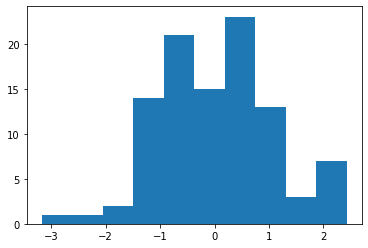

In [13]:
plt.hist(test_data)
plt.show()

In [14]:
stat, p = shapiro(n_test_data)

print('Statistic : %.2f, p-value: %.30f ' %(stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

Statistic : 0.98, p-value: 0.262646287679672241210937500000 
Normal distribution


<h3>D'Agostino's K^2 Normality Test</h3>

In [15]:
from scipy.stats import normaltest

test_data = df['volatile acidity']

stat, p = normaltest(test_data)

print('Statistic : %.2f, p-value: %.30f ' %(stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')
    

Statistic : 143.42, p-value: 0.000000000000000000000000000000 
Not a normal distribution


In [17]:
stat, p = shapiro(n_test_data)

print('Statistic : %.2f, p-value: %.30f ' %(stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

Statistic : 0.98, p-value: 0.278449147939682006835937500000 
Normal distribution


<h2>Correlation Test</h2>

<h3>Pearson and Spearman’s Rank Correlation</h3>

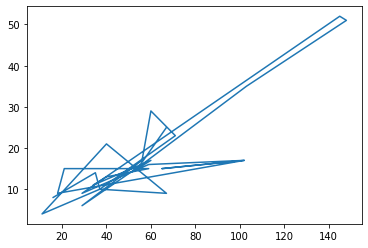

In [19]:
FirstSample = df[1:30]['total sulfur dioxide']
SecondSample = df[1:30]['free sulfur dioxide']

plt.plot(FirstSample,SecondSample)
plt.show()

In [21]:
from scipy.stats import spearmanr
stat, p = spearmanr(FirstSample, SecondSample)

print('Statistic : %.2f, p-value: %.30f ' %(stat, p))

if p > 0.05:
    print('Independent samples')
else:
    print('Dependent Samples')


Statistic : 0.81, p-value: 0.000000139489147549749254185653 
Not a normal distribution


In [22]:
#pearson correlation
from scipy.stats import pearsonr

stat, p = pearsonr(FirstSample, SecondSample)

print('Statistic : %.2f, p-value: %.30f ' %(stat, p))

if p > 0.05:
    print('Independent samples')
else:
    print('Dependent samples')

Statistic : 0.85, p-value: 0.000000003654950287505688486911 
Dependent samples
